# Linear Regression, Principal Component Analysis and Linear Discriminant Analysis


For Linear Regression we will be loading in some 2D datapoints and fitting a linear regression model, before visualizing the resulting fit. 

For Principal Component Analysis and Linear Discriminant Analysis we will be analysing and reducing the feature space of the Wine dataset.

 we will then look at using pre-implemented functionality for these tasks by using sklearn.
   

In [1]:

# Shashank Shekhar
# 940491

import numpy as np
import matplotlib.pyplot as plt

##  Linear Regression
This task will load the  data from y_observations.npy and x_points.npy and fit a linear regression model to the data. We plot the development of the model training in each step. The following subtasks are:
1. Plot the data.
2. Select a number of iterations.
3. Selection a learning rate.
4. Plot the initial model prediction.
5. Calculate the predicted y values.
6. Update w0.
7. Update w1.



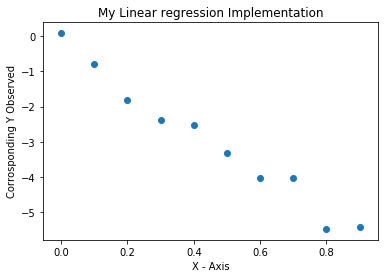

In [2]:
# Load the regression problem data
x = np.load('x_points.npy')
y = np.load('y_observations.npy')

# Plot the observed data
plt.scatter(x,y);

plt.xlabel('X - Axis')
plt.ylabel('Corrosponding Y Observed')
plt.title('My Linear regression Implementation')
plt.show();

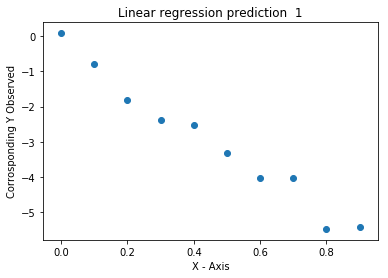

-> Iter: 0, Update w0: -2.00, Update w1: -1.08, MSE: 2.32558524


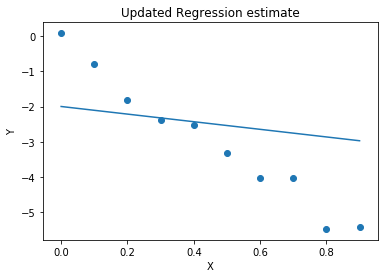

-> Iter: 50, Update w0: -0.46, Update w1: -5.60, MSE: 0.09808165


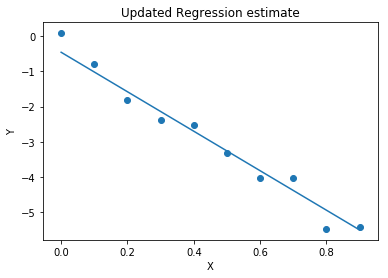

Final model: w0 = -0.28, w1 = -5.98, MSE = 0.08401117


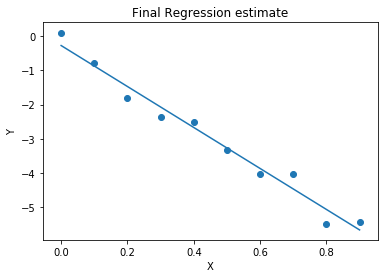

In [3]:
# Initialise starting parameters w0 and w1
w0 = np.random.rand()
w1 = np.random.rand()

# Select training hyper-parameters: number of iterations and learning rate control parameter alpha
number_of_iterations = 100# Select a number of iterations.
alpha = 0.7# Select a value for alpha (between 0 and 1).


plt.figure()
plt.scatter(x,y);
plt.xlabel('X - Axis')
plt.ylabel('Corrosponding Y Observed')
plt.title('Linear regression prediction  1')
plt.show();

# Iterate
for i_iteration in range(0, number_of_iterations):
    
    # Predicted Y values of X with current w0 and w1 parameters
    y_fit = w1*x + w0;#predict y_fit = f(w0,w1,x) = wx+b
    
    # Calculate difference between observed data and model's prediction
    y_diff = y_fit - y 
    
    # Calculate partial derivative of mean squares error with respect to w0
    pd_mse_w0 = np.sum(y_diff) / np.size(y)
    
    # Calculate partial derivative of mean squares error with respect to w1
    pd_mse_w1 = np.sum(y_diff * x) / np.size(y)
    
    # Update w0
    w0factor = pd_mse_w0*alpha;
    w0 = w0 - w0factor# Update w0 parameter. 
    
    # Update w1
    w1factor = pd_mse_w1*alpha;
    w1 = w1  - w1factor#  Update w1 parameter. 
    
    # Calculate MSE 
    mse = np.mean(((w0 + w1 * x) - y) ** 2)
    
    # Print progress
    if (i_iteration % 50) == 0:
        print("-> Iter: {0}, Update w0: {1:.2f}, Update w1: {2:.2f}, MSE: {3:.8f}".format(i_iteration, w0, w1, mse))
        plt.scatter(x, y)
        plt.plot(x, w0 + w1 * x)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Updated Regression estimate')
        plt.show(block=False)
        
print("Final model: w0 = {0:.2f}, w1 = {1:.2f}, MSE = {2:.8f}".format(w0, w1, mse))
plt.scatter(x, y)
plt.plot(x, w0 + w1 * x)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Regression estimate')
plt.show(block=False)


##  Principal Component Analysis
This task will load the  data from wineData.npy and wineLabels.npy and perform Principal Component Analysis on the data in order to reduce the feature dimensionality of the problem. We first divide the dataset into a training and testing set and perform the PCA projection on each set. The following subtasks are:
1. Load the data and labels.
2. Plot the original dataset.
3. Divide the dataset into a testing and training set. 
4. Plot the two sets on the same figure. 
5. Mean-centre the training set for SVD.
6. Plot the percentage variance explained by each component. 
7. Select a number of components to keep based on the explained variance.
8. Create the projection matrix by slicing into Vt.
9. Project the training data into the Principal Component space.
10. Mean-centre and project the testing data into the Principal Component space.
11. Plot the training and testing set in the Principal Component space.



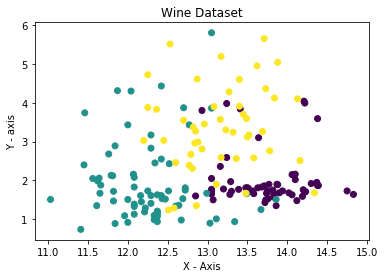

In [4]:
# Load in the Wine dataset
#  load wine data and wine labels into x and y respectively.
x = np.load('wineData.npy')
y =np.load('winelabels.npy')

# Plot two feature dimensions against eachother

plt.figure()
plt.scatter(x[:,0],x[:,1],c=y);


plt.xlabel('X - Axis')
plt.ylabel('Y - axis')
plt.title('Wine Dataset')
plt.show();


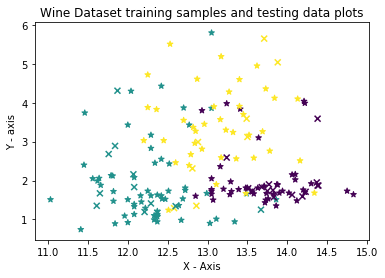

In [5]:
# Select data points to divide into a training and testing set
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)

# Divide the dataset into the two sets
test_data = x[testing_indices,:];#  Index into the data and extract the testing samples.
test_labels = y[testing_indices];# Index into the labels and extract the testing labels.
train_data = x[training_indices,:];#  Index into the data and extract the training samples.
train_labels = y[training_indices];#  Index into the labels and extract the training labels.


plt.figure()
plt.scatter(train_data[:,0],train_data[:,1],marker='*',c=train_labels);
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=test_labels);


plt.xlabel('X - Axis')
plt.ylabel('Y - axis')
plt.title('Wine Dataset training samples and testing data plots')
plt.show();


In [6]:
# Perform PCA on the training data
mu = np.mean(train_data,axis=0);#  Calculate the mean vector of the data.
centred_train_data = train_data - mu;#  Mean-centre the training samples.
U, S, Vt = np.linalg.svd(centred_train_data)


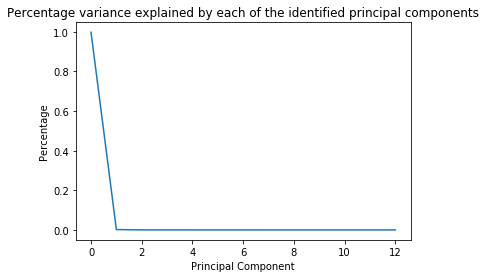

In [12]:
# Calculate the variance explained by each of the principal components. This may help you to select a number of
# principle components to keep
percentage_variance_explained = S**2 / np.sum(S**2)

# Plot the percentage variance explained by each of the principal component spaces

plt.figure()
plt.plot(percentage_variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Percentage')
plt.title('Percentage variance explained by each of the identified principal components')
plt.show(block=False)

In [7]:
# Select the number of components to keep and create the projection matrix
num_components = 2#  Select a number of principal components to keep. Hint: Look at the figure above.
projection_matrix =  Vt[0:num_components,:];# Slice into Vt to obtain projection matrix.

# Project the training data into the Principal Component space
projected_train_data = np.dot((train_data - mu) , projection_matrix.T);# 

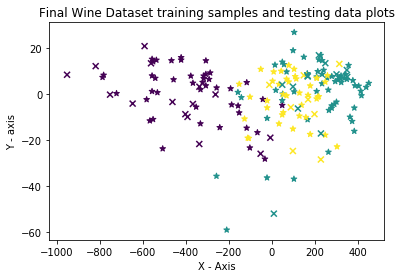

In [8]:
# Project the testing data into the Principal Component space
centred_test_data = test_data - mu;#  Mean-centre the testing data.

# Project the data into principal component space
projected_test_data = np.dot(centred_test_data , projection_matrix.T);#  Project the training data into the new PCA space. 

plt.figure()
plt.scatter(projected_train_data[:,0],projected_train_data[:,1],marker='*',c=train_labels);
plt.scatter(projected_test_data[:,0],projected_test_data[:,1],marker='x',c=test_labels);


plt.xlabel('X - Axis')
plt.ylabel('Y - axis')
plt.title('Final Wine Dataset training samples and testing data plots')
plt.show();

##  Linear Discriminant Analysis
This task we will  load the  data from wineData.npy and wineLabels.npy and now we will perform Linear Discriminant Analysis on the data in order to reduce the feature dimensionality of the problem. The following subtasks are:
1. Load the data and labels.
5. Calculate the mean of each class in order to compute the within- and between-class scatter matrices.
6. Calculate and plot the percentage variance explained by each discriminant. 
7. Select a number of discriminants to keep based on the explained variance.
9. Project the data into the linear discriminant space.
11. Plot the data in the linear discriminant space.



In [9]:
# Load Wine data
# load wine data and wine labels into x and y respectively.
x = np.load('wineData.npy');
y =np.load('winelabels.npy');

In [10]:
# Define some basic data properties
num_class = np.max(y) + 1
num_samples = x.shape[0]
num_features = x.shape[1]

# Calculate class sample counts
num_samples_in_class = np.zeros(num_class)
for i_class in range(num_class):
    num_samples_in_class[i_class] = x[y==i_class, :].shape[0]

# Calculate class means
mu = np.mean(x, axis=0)
mu_class = np.zeros((num_class, num_features))
for i_class in range(num_class):
    mu_class[i_class, :] = np.mean(x[ i_class == y, :], axis = 0);#  Calculate mean vector of each class. 

# Calculate within-class scatter matrix
Sw = np.zeros((num_features, num_features))
for i_class in range(num_class):
    Si = np.zeros((num_features, num_features))
    cluster_data = x[y==i_class, :]
    for i_data in range(cluster_data.shape[0]):
        centred_datapoint = cluster_data[i_data:i_data+1, :] - mu_class[i_class:i_class+1, :]
        Si += centred_datapoint.T @ centred_datapoint
    Sw += Si
    
# Calculate between-class scatter matrix
mu_class_mu = np.zeros((num_class, num_features))
for i_class in range(num_class):
    mu_class_mu[i_class, :] = mu_class[i_class, :] - mu
    
Sb = np.zeros((num_features, num_features))
for i_class in range(num_class):
    Sb += num_samples_in_class[i_class] * mu_class_mu[i_class:i_class+1, :].T @ mu_class_mu[i_class:i_class+1, :]

# Solve eigen decomposition for inv(Sw)Sb
eigvalues, eigvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Eig doesn't guarantee a sorted output, so sort the eigenvectors based on the eigenvalues
sorted_indices = np.argsort(eigvalues)[::-1]
eigvalues = eigvalues[sorted_indices]
eigvectors = eigvectors[:, sorted_indices]

C:\Users\shekh\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


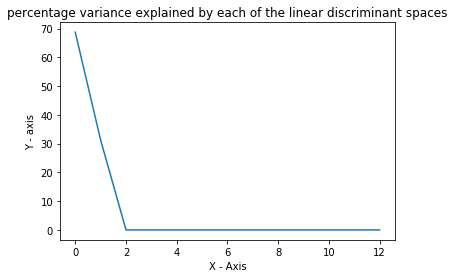

In [26]:
# Calculate the variance explained by each of the principal components
# Calculate the percentage variance explained by each of the linear discriminant spaces.
perValExplained = eigvalues / sum(eigvalues) * 100

plt.figure()
plt.plot(perValExplained);



plt.xlabel('X - Axis')
plt.ylabel('Y - axis')
plt.title('percentage variance explained by each of the linear discriminant spaces')
plt.show();

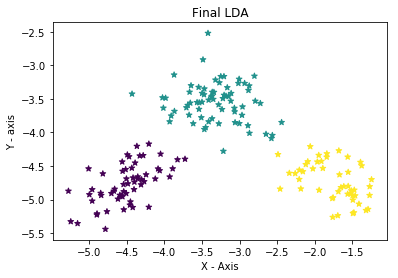

In [11]:
# Select the feature channels we want to keep based on the variance explained by the Linear Discriminant Analysis
n_dimensions = 2# Select a number of discriminant spaces to keep.
projection_matrix = eigvectors[:, 0:n_dimensions].real 

# Project observed data into the new subspace
projected_data = x @ projection_matrix


plt.figure()
plt.scatter(projected_data[:,0],projected_data[:,1],c=y,marker="*");



plt.xlabel('X - Axis')
plt.ylabel('Y - axis')
plt.title('Final LDA')
plt.show();

# Using SciKit-Learn
In this section we will utilise SciKit-Learn and use the built-in API functionality to complete the tasks from above.

We will again perform Linear Regression on the toy data, and Principal Component Analysis and Linear Discriminant Analysis on the wine dataset.

We can use the <b>sklearn.linear_model.LinearRegression</b> object to fit a regression model to our toy data using the <i>fit</i> function.

We can use the <b>sklearn.decomposition.PCA</b> object to analyse the observed data and project it to the new principle component space using the <i>fit_transform</i> function. 

We can use the <b>sklearn.discriminant_analysis</b> object to analyse the observed data and project it to the new new discriminant space using the <i>fit_transform</i> function. 



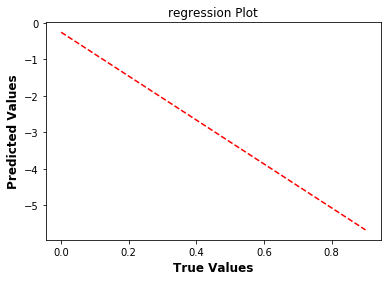

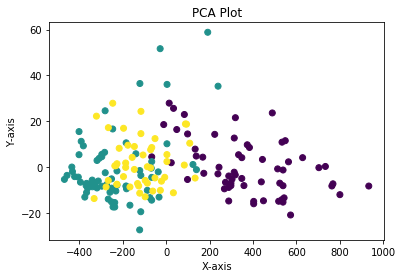

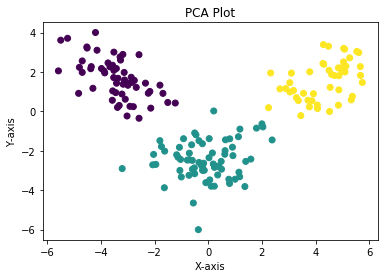

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Use sklearn for Linear Regression

x = np.load('x_points.npy')
y = np.load('y_observations.npy')
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)
    

regr = LinearRegression()
regr.fit(X, Y)
plt.plot(X, regr.predict(X), "--", label = 'Regression', color = 'r')
plt.title('regression Plot')
plt.xlabel('True Values', fontsize = 12, weight = 'bold')
plt.ylabel('Predicted Values', fontsize = 12, weight = 'bold')
plt.show();






# Use sklearn for PCA


X= np.load('wineData.npy')
Y= np.load('wineLabels.npy')
Pca=PCA(n_components=2)
fit_x = Pca.fit_transform(X)
plt.figure()
plt.scatter(fit_x[:,0], fit_x[:,1], c = Y)
plt.title('PCA Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show();


# Use sklearn for LDA



X= np.load('wineData.npy')
Y= np.load('wineLabels.npy')
Lda=LinearDiscriminantAnalysis(n_components=2)
fitlda_x = Lda.fit_transform(X , Y)
plt.figure()
plt.scatter(fitlda_x[:,0], fitlda_x[:,1], c = Y)
plt.title('PCA Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show();

